#### 1- Load the dataset into a Pandas DataFrame and perform exploratory data analysis (EDA) to understand the features and their distributions.


In [1]:
import pandas as pd

df = pd.read_csv("Mall Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


array([[<Axes: xlabel='CustomerID', ylabel='CustomerID'>,
        <Axes: xlabel='Age', ylabel='CustomerID'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='CustomerID'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='CustomerID'>],
       [<Axes: xlabel='CustomerID', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='CustomerID', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)',

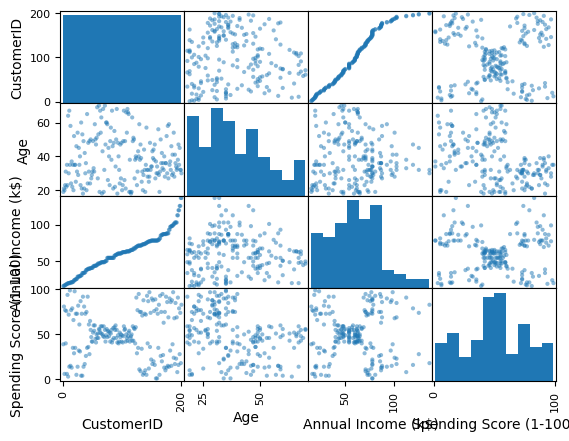

In [2]:
print(df.dtypes)

numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
print(numerical_columns)

pd.plotting.scatter_matrix(df[numerical_columns])

#### 2- Preprocess the data if necessary, handling missing values and encoding categorical variables. Perform feature scaling if required to ensure that all features have the same scale. (10)


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print("Gender encoding mapping：")
print(gender_mapping)

df

Gender encoding mapping：
{0: 'Female', 1: 'Male'}


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#### 3- Apply three different clustering algorithms such as K-means, Agglomerative Hierarchical Clustering, and DBSCAN on the preprocessed data. (60)


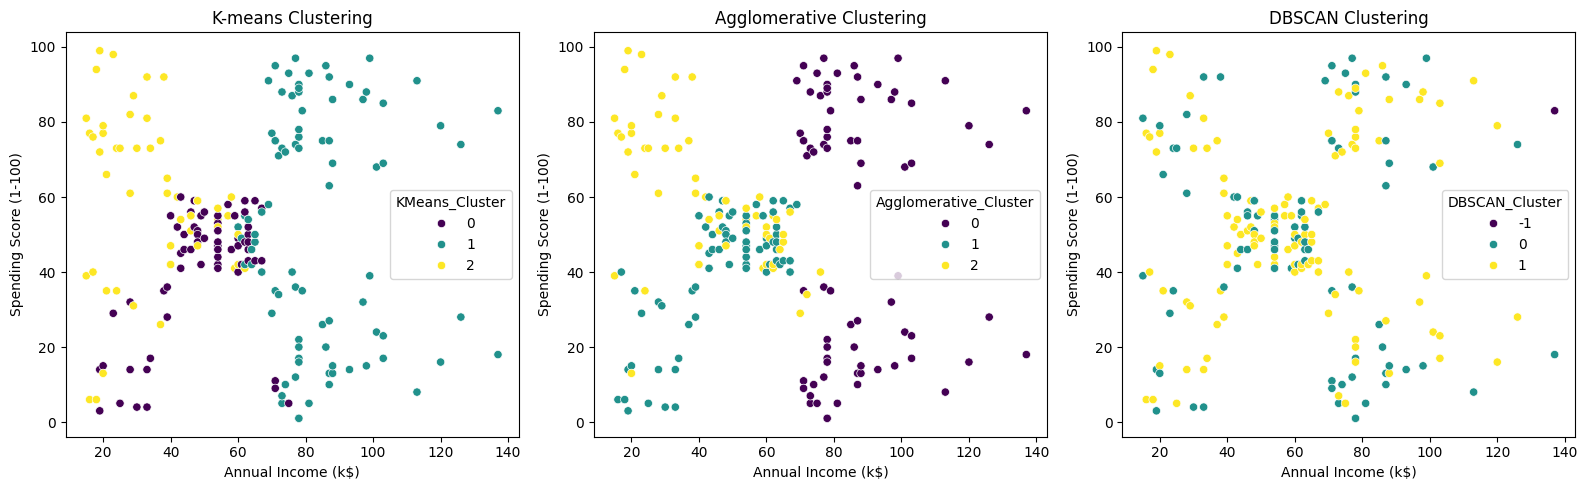

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df["KMeans_Cluster"] = kmeans_labels


agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo_labels = agglo.fit_predict(scaled_data)
df["Agglomerative_Cluster"] = agglo_labels


dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)
df["DBSCAN_Cluster"] = dbscan_labels


plt.figure(figsize=(16, 5))

# K-means
plt.subplot(1, 3, 1)
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["KMeans_Cluster"],
    palette="viridis",
)
plt.title("K-means Clustering")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Agglomerative_Cluster"],
    palette="viridis",
)
plt.title("Agglomerative Clustering")

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["DBSCAN_Cluster"],
    palette="viridis",
)
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

#### 4- Evaluate the performance of each clustering algorithm using appropriate metrics such as silhouette score, Davies-Bouldin index, or any other relevant metric. (30)


In [6]:
from sklearn.metrics import davies_bouldin_score, silhouette_score


def evaluate_clustering(data, labels, method_name):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        print(f"{method_name} Evaluation:")
        print(f"  Silhouette Score: {silhouette:.3f}")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}")
    else:
        print(f"{method_name} Evaluation: Not enough clusters for metrics.\n")


# K-means
evaluate_clustering(scaled_data, kmeans_labels, "K-means")

# Agglomerative Clustering
evaluate_clustering(scaled_data, agglo_labels, "Agglomerative Clustering")

# DBSCAN
evaluate_clustering(scaled_data, dbscan_labels, "DBSCAN")

K-means Evaluation:
  Silhouette Score: 0.252
  Davies-Bouldin Index: 1.340
Agglomerative Clustering Evaluation:
  Silhouette Score: 0.236
  Davies-Bouldin Index: 1.445
DBSCAN Evaluation:
  Silhouette Score: 0.179
  Davies-Bouldin Index: 1.406
